# Data Formats & Types

Like the title says - Data Formats & Types.  The data you'll run across carries structures and hierarchies we should be aware of, and there are different types of ways information can be recorded which are required for certain types of analysis and modeling.

Let's start with unit structures and nested hierarchies contained in the data.

<h3>Data Formats</h3>

What do we mean by data formats?  These are structures in the data that can be thought of as how the data relates to itself.  Whenever the conversation turns to talking about what kind of data is available for your project, you should immediately start asking questions about what's know as the unit, or level, of analysis to understand how to analyze the data properly.  After that, we want to start thinking about the "shape" of our data, i.e. wide vs. long.

- Unit of Analysis
- Wide vs. Long Data

This is all stuff you can hopefully cover early when you start working with project sponsors and scoping out the details.

<h5>Unit of Analysis</h5>

_Unit of analysis_, or level of analysis, is generally the first thing we want to understand when we start analyzing the structure of our data.  You can think of this as the details contained in a _row_ of data.  It always made sense to me to also think of it as having some kind of subject, e.g. by Customer, by Region, or by Manufacturer.  If our data has been prefiltered down to just one Customer, then you'll only have one unit/level, but it's still the highest _object_ level that everything else in the data relates to.

```{note}
Unit of Analysis is the lowest grain of the dataset, conveying what information is recorded in a row of data.
```

For example, if we have a sales report and we have a column called "Customer", then I would say our data scope is "Sales, by Customer".  We may also see nested hierarchies such as "by Customer, by Region".  So you might see something like - Costco as the customer, and then there are 3 Regions, Midwest, Northeast, and South, that all roll up to the Costco header level.  You will also frequently run into having a time frame or frequency in your data as well.  So it might be something like "by Customer, by Region, by Day".

These are all examples of the unit of analysis that map to whatever the data in your set actually is.  If it's a daily sales report, then it's "Sales, by Customer, by Region, by Day".  Each Customer-Region will have sales for each day for the overall time horizon of your data set.

It'll be much easier to grasp if we jump in and look at some actual data.  Below we read in the classic Iris flower dataset from the `pydataset` library and take a look.  This one is about as simple as it gets.

In [1]:
# Import libraries
from pydataset import data
import pandas as pd
import plotnine as gg

# Uncomment to see available datasets
#ds = data()

# Print the documentation for the iris dataset
print(data("iris", show_doc = True))

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

We can see from the documentation above that this set is 150 observations of individual flowers, recording 4 measurements and 1 variable indicating the specific Specie of flower.  Now let's go ahead and read it into our environment and take a look.

In [2]:
# Read in the data and print 10 rows
dat = data("iris")
dat.sample(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
108,7.3,2.9,6.3,1.8,virginica
61,5.0,2.0,3.5,1.0,versicolor
130,7.2,3.0,5.8,1.6,virginica
22,5.1,3.7,1.5,0.4,setosa
60,5.2,2.7,3.9,1.4,versicolor
82,5.5,2.4,3.7,1.0,versicolor
147,6.3,2.5,5.0,1.9,virginica
117,6.5,3.0,5.5,1.8,virginica
86,6.0,3.4,4.5,1.6,versicolor
75,6.4,2.9,4.3,1.3,versicolor


This one is pretty straightforward.  What do you think?  What would you say the unit of analysis is?  What does each row correspond to?

If you asked me, I'd say it's -

> Measurements, by **Flower** (each row are the measurements for just one flower)

<br>

Ok, that was an easy one.  How about the Gasoline Consumption dataset below from the same `pydataset` library?

In [4]:
# Uncomment to see available datasets
#ds = data()

# Read-in the Gasoline dataset
#data("Gasoline", show_doc = True)
dat = data("Gasoline")
dat

,country,year,lgaspcar,lincomep,lrpmg,lcarpcap
1,AUSTRIA,1960,4.173244,-6.474277,-0.334548,-9.766840
2,AUSTRIA,1961,4.100989,-6.426006,-0.351328,-9.608622
3,AUSTRIA,1962,4.073177,-6.407308,-0.379518,-9.457257
4,AUSTRIA,1963,4.059509,-6.370679,-0.414251,-9.343155
5,AUSTRIA,1964,4.037689,-6.322247,-0.445335,-9.237739
...,...,...,...,...,...,...
338,U.S.A.,1974,4.798626,-5.328694,-1.231467,-7.617558
339,U.S.A.,1975,4.804932,-5.346190,-1.200377,-7.607010
340,U.S.A.,1976,4.814891,-5.297946,-1.154682,-7.574748
341,U.S.A.,1977,4.811032,-5.256606,-1.175910,-7.553458


What do you think?  Can you see the categorical and hierarchical levels in the data?  If I was working on this project, I would say the unit of analysis for our data is

>"Gas Consumption, by **Country**, by **Year**"

Did you come up with the same?

Maybe you're asking why understanding this level of analysis thing matters?  Well, there are a number of super important reasons.  First and foremost, you need to know how to read the data so you can analyze what's being recorded.  One of the first things you might want to do is some exploratory summary descriptive kind of views.  You'll have a very difficult time knowing how to ask your questions and look at the data if you don't know how it's structured.

For the gasoline consumption example above, we can ask a few basic investigatory questions now that we understand it's "Gas Consumption, by **Country**, by **Year**".  We'll cover this in much more detail in the upcoming {doc}`../Chapter5/EDA` section, but for now see if you can follow along without too much explanation.

See if you can spot the difference between the "grouping" conditions we pivot the data on versus the "values" we want to analyze.

In [5]:
# Count how many records each country has for each year
dat.groupby('country')['year'].value_counts().unstack(0)

country,AUSTRIA,BELGIUM,CANADA,DENMARK,FRANCE,GERMANY,GREECE,IRELAND,ITALY,JAPAN,NETHERLA,NORWAY,SPAIN,SWEDEN,SWITZERL,TURKEY,U.K.,U.S.A.
year,,,,,,,,,,,,,,,,,,
1960,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1961,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1962,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1963,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1964,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1965,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1966,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1967,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1968,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Now we know that every country has at least one record for every year, what if we wanted to aggregate the data in some way?  You'd need to know what levels you want to roll your values up to.  See below.

In [6]:
# Calculate the mean gasoline consumption for each country over all of the years
agg_dat = dat.groupby(['country'])['lgaspcar'].mean().reset_index().rename({'lgaspcar': 'avg_lgaspcar'}, axis = 1)
agg_dat.sort_values(by = ['avg_lgaspcar'], ascending = False)

,country,avg_lgaspcar
15,TURKEY,5.766355
6,GREECE,4.878679
2,CANADA,4.862402
17,U.S.A.,4.819075
9,JAPAN,4.699642
14,SWITZERL,4.237586
7,IRELAND,4.225560
3,DENMARK,4.189886
11,NORWAY,4.109773
10,NETHERLA,4.080338


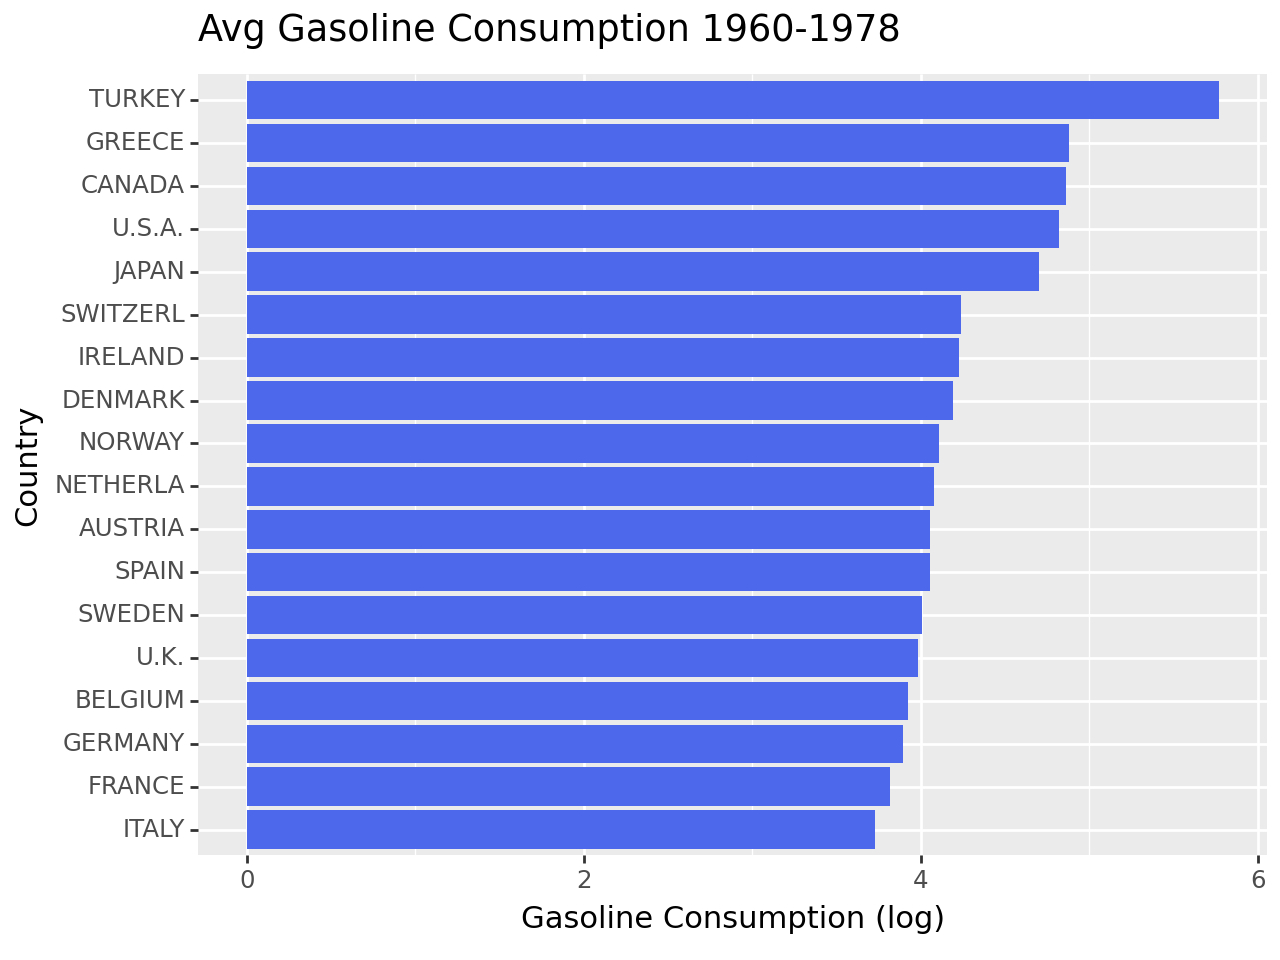

<Figure Size: (640 x 480)>

In [7]:
# Plot the average gasoline consumption for each country
(gg.ggplot(agg_dat, gg.aes(y = 'avg_lgaspcar', x = 'reorder(country, avg_lgaspcar)')) +
    gg.geom_bar(stat = "identity", fill = "#4E68EC") +
    gg.xlab("Country") +
    gg.ylab("Gasoline Consumption (log)") +
    gg.ggtitle("Avg Gasoline Consumption 1960-1978") +
    gg.coord_flip())

This dataset is pretty simple too so no doubt you would have been able to figure all of this out without having to realize that you were actually considering the unit of analysis as you were going along, but at least notice all of the things we needed to know about our data for a simple aggregation and a basic plot.

When our data starts to get more complicated, and I promise it will in the real world, you will absolutely want to make sure you take adequate time in the beginning scoping stages of your project to think about what levels you have so you can be better prepared to ask great questions and interrogate your data properly.

<h5>Wide vs. Long Data</h5>

Next up we'll take a look at some of the common data _shapes_ you'll run into.

Basically the idea here is that data can be recorded in a couple of different ways.  Different structures require different operations for creating new data, aggregating, building graphs and plots, modeling, and many other data munging techniques.  None of these formats are right or wrong necessarily, but as you'll come to learn it's really just a function of how the data was generated/stored coupled with what we need to do with it, and if those two align or not.  If they do not align, well, then you'll need to do something about it by reshaping the data somehow.  This is where we go next.

Let's see what we're talking about by creating a small synthetic set to illustrate.

In [8]:
import pandas as pd
import numpy as np

dat = pd.DataFrame({"date": pd.to_datetime(["2024-01-01"] * 4 + ["2024-01-02"] * 4 + ["2024-01-03"] * 4),
                    "class": ["History", "Science", "Math", "Art"] * 3,
                    "score": np.random.choice(range(90, 101), 12)})
dat

,date,class,score
0,2024-01-01,History,100
1,2024-01-01,Science,99
2,2024-01-01,Math,100
3,2024-01-01,Art,96
4,2024-01-02,History,97
5,2024-01-02,Science,92
6,2024-01-02,Math,100
7,2024-01-02,Art,95
8,2024-01-03,History,94
9,2024-01-03,Science,94


Want to venture a guess as to whether this is _wide_ or _long_ data?

That's correct!  I have no doubt you said _long_ data.  Good job.

```{note}
Long data consists of one row per unit of analysis per time period.  Therefore, each subject will have multiple rows (if there are multiple other levels in the unit of analysis.
```

We're introducing a really useful construct published by a well known practioner in the field named Hadley Wickham.  If you don't know who he is, you should definitely look him up.  While he works with the R programming language, he's contributed an unbelievable amount of ideas, best practices, and coding methodologies that have permeated the field, regardless of which language you use.  One of those ideas is the notion of "tidy" data.  See {cite}`Wickham_2014` for more details.

Tidy data is designed to make doing data analysis easier.  It's really great for plotting and graphing as you'll learn soon, and lends itself really well to filtering and querying because all of the levels are contained in one column (e.g. Class) vs. having to write a statement for _each_ column of the levels if they were all broken out into their own column.

In [9]:
# This would require a loop or at least 2 or 3 statements if the data was wide instead of long
dat[dat['class'].isin(['Math', 'Art'])]

,date,class,score
2,2024-01-01,Math,100
3,2024-01-01,Art,96
6,2024-01-02,Math,100
7,2024-01-02,Art,95
10,2024-01-03,Math,99
11,2024-01-03,Art,98


So how about _wide_ data then?  I'm sure you can already imagine what it might look like.  Imagine casting all of the individual levels of a variable out into their own columns.  So each Class will now have their own column, and the value will be the Score.  Pretty simple.

```{note}
Wide data will have each subject's information spread out horizontally in a single row, with each variable in a separate column, vs. having repeated rows for all of the additional variable levels of analysis.
``` 
  
Instead of creating a new wide set to illustrate, let's introduce the topic of _pivoting_ and transform our long data we've already created.  We'll use the pandas `groupby()` function coupled with `unstack()` to cast a long set into wide.  Alternatively, you could have used the `pivot()` function as well.  Using the `groupby()` method though will make it much easier to deal with naming and accessing the nested elements created when you get started pivoting your data.  It can actually get pretty complicated, so finding a simple and reuseable syntax you like is worth its weight in gold.  You'll learn there's no one way to do anything in this field so pick whatever works for you!

In [10]:
# Reshape our long dataset into wide
wide_dat = (dat
                .groupby(['date','class'])['score']
                .mean()
                .unstack('class')
                .rename_axis(None, axis = 'columns')
                .reset_index())
#wide_dat = dat.pivot(index = ['date'], columns = ['class'], values = ['score'])
wide_dat

,date,Art,History,Math,Science
0,2024-01-01,96.0,100.0,100.0,99.0
1,2024-01-02,95.0,97.0,100.0,92.0
2,2024-01-03,98.0,94.0,99.0,94.0


Now what about reshaping from wide to long data?  Again we'll turn to a pandas function called `stack()`.  Let's see it in action by undoing what we just did, and recasting our `wide_dat` back into a long format.

In [11]:
# Pivot the data from wide to long with "stack"
long_dat = (wide_dat
                .groupby(['date'])
                .mean()
                .stack()
                .rename_axis(['date','class'], axis = 'index')
                .reset_index()
                .rename(columns = {0: 'score'}))
long_dat

,date,class,score
0,2024-01-01,Art,96.0
1,2024-01-01,History,100.0
2,2024-01-01,Math,100.0
3,2024-01-01,Science,99.0
4,2024-01-02,Art,95.0
5,2024-01-02,History,97.0
6,2024-01-02,Math,100.0
7,2024-01-02,Science,92.0
8,2024-01-03,Art,98.0
9,2024-01-03,History,94.0


Nicely done.  You'll come to understand that this topic of data structures and formats can actually become super complicated and difficult to deal with.  This is why we spend so much of our time working and massaging the data.  It often takes quite a bit of effort to get it in the right shape for the analysis we want to perform.

<h3>Data Types</h3>

Moving on to Data Types!  In addition to all of the shapes and formats our data may take, there are several different types of data we will encounter.  We'll discuss the properties of each in more detail when we get to the {doc}`../Chapter6/machine_learning` section, so here we'll only introduce the types and cover a high level view of the following.

- Cross sectional
- Time series
- Panel
- Text

Most of the data will fall into the category of "structured" data, think rows and columns (like Excel), with Text data being the most common exception usually coming in "unstructred" blocks of text.  There are other more exotic data to be sure, but this will cover the common ones you'll deal with the most often.

In [15]:
# Import libraries
from pydataset import data
import pandas as pd
import plotnine as gg
import warnings 
warnings.filterwarnings('ignore')

<h5>Cross Sectional</h5>

```{note}
Cross Sectional data refers to variables and measures recorded at the same point in time.
```

Recall our iris dataset from earlier?  It's a classic example of a cross-sectional data set because it's a collection of measurements (lengths and widths) for multiple flowers, all recorded at the same time.

In [13]:
# Read in the data and print 10 rows
#data("iris", show_doc = True)
dat = data("iris")
dat.sample(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
14,4.3,3.0,1.1,0.1,setosa
147,6.3,2.5,5.0,1.9,virginica
76,6.6,3.0,4.4,1.4,versicolor
141,6.7,3.1,5.6,2.4,virginica
65,5.6,2.9,3.6,1.3,versicolor
66,6.7,3.1,4.4,1.4,versicolor
128,6.1,3.0,4.9,1.8,virginica
90,5.5,2.5,4.0,1.3,versicolor
126,7.2,3.2,6.0,1.8,virginica
70,5.6,2.5,3.9,1.1,versicolor


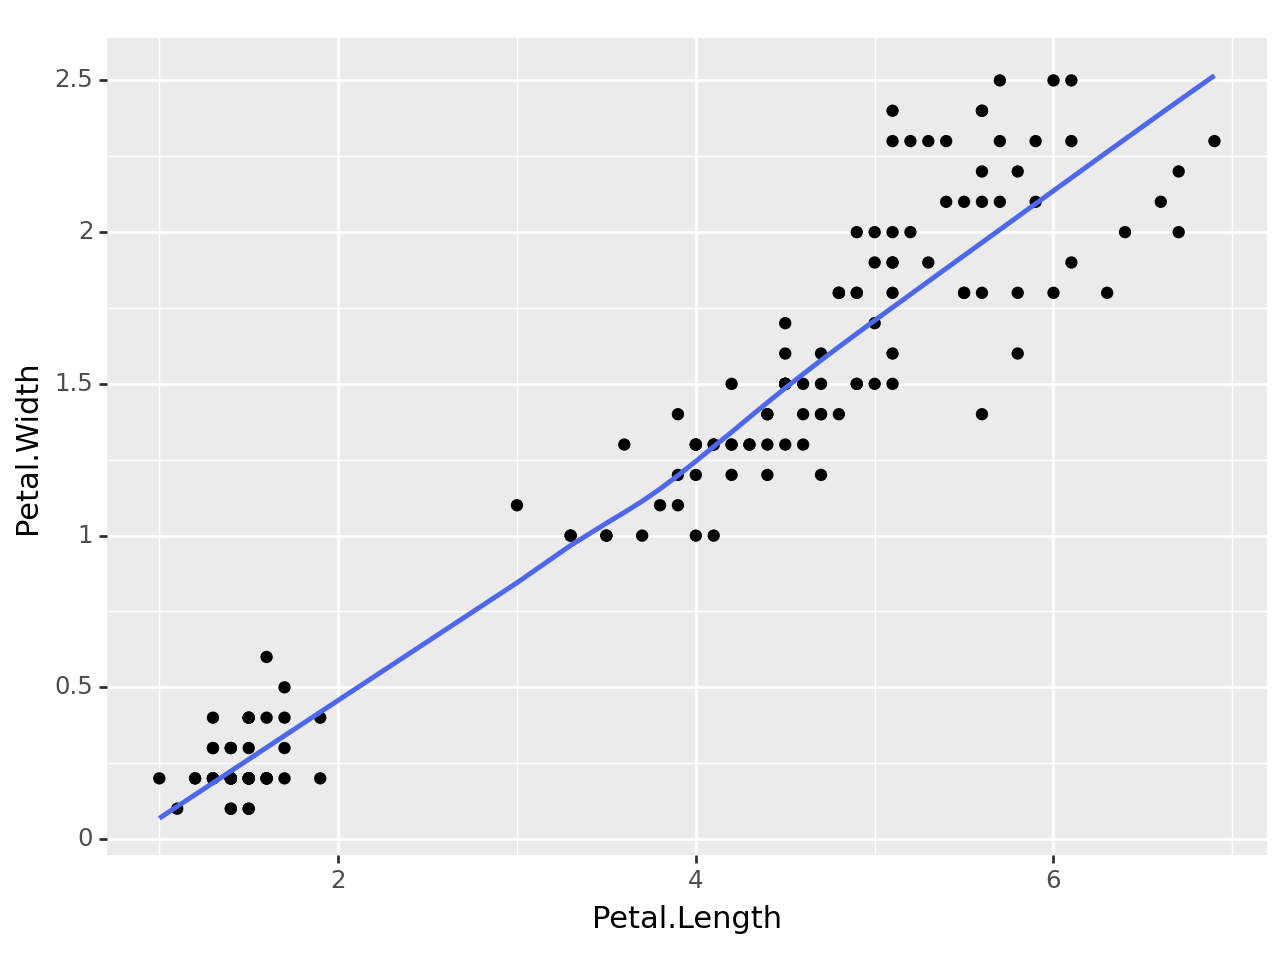

<Figure Size: (640 x 480)>

In [16]:
# Plot a bivariate scatterplot with a linear fit line
(gg.ggplot(dat, gg.aes(x = 'Petal.Length', y = 'Petal.Width')) +
     gg.geom_point() +
     gg.geom_smooth(color = '#4E68EC'))

<h5>Time Series</h5>

```{note}
Time Series data refers to a subject and variables recorded at different points in time (usually at regular intervals).
```

When we're dealing with what's known as _univariate_ (only a single dependent variable), the data tends to be very simple.  We usually just have a column or two with categorical fields like "Customer" or "Region", then some kind of time variable such as "Day", "Month", or "Year", and then some numeric value of interest like "Sales", "Profit", or maybe "Earnings".

In [17]:
# Read in the Johnson & Johnson quarterly earnings data and print the first 4 years
#data("JohnsonJohnson", show_doc = True)
dat = data("JohnsonJohnson").rename(columns = {'time': 'quarter', 'JohnsonJohnson': 'earnings'})[1:17]
dat

,quarter,earnings
2,1960.25,0.63
3,1960.50,0.85
4,1960.75,0.44
5,1961.00,0.61
6,1961.25,0.69
7,1961.50,0.92
8,1961.75,0.55
9,1962.00,0.72
10,1962.25,0.77
11,1962.50,0.92


Time series data is a fun one to display graphically.  Time across the x-axis, and the numeric value in the y-axis.  You will build this kind of graph frequently when you get into real time series projects.

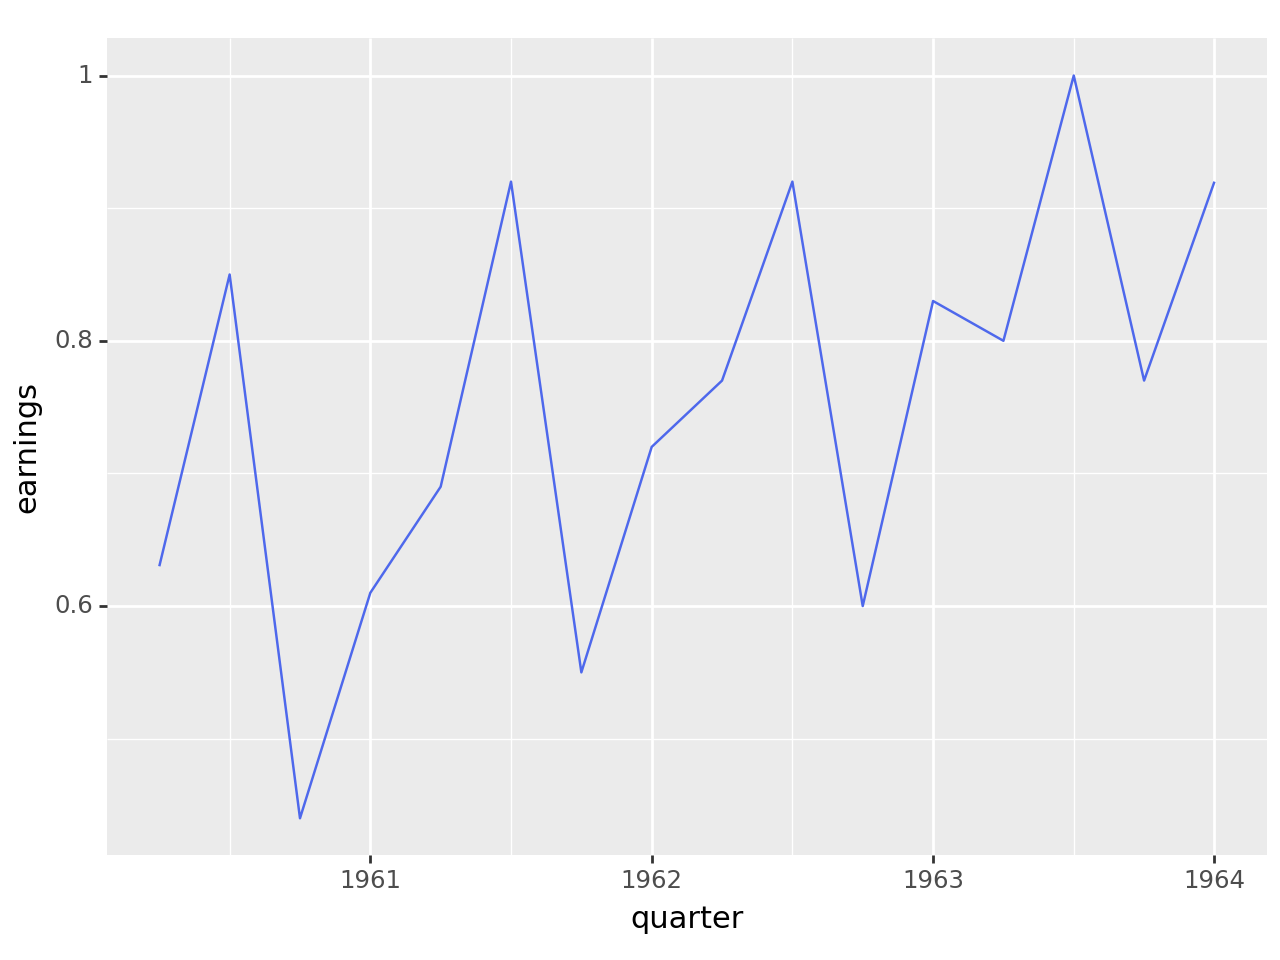

<Figure Size: (640 x 480)>

In [18]:
# Plot a trend line for quarterly earnings
(gg.ggplot(dat, gg.aes(x = 'quarter', y = 'earnings')) +
     gg.geom_line(color = '#4E68EC'))

<h5>Panel</h5>

```{note}
Panel, or longitudinal, data refers to variables and measures across multiple cross sections at different points in time.
```

And we've already seen an example of Panel data as well.  Remember the Gas Consumption dataset from before?  Recall how the unit of analysis was "Gas Consumption, by **Country**, by **Year**"?  Well, that's panel data.  Multiple cross-sections of subjects recorded at multiple points in time.

In [19]:
# Read in the data and print the first 10 rows
#data("Gasoline", show_doc = True)
dat = data("Gasoline")
dat[0:10]

,country,year,lgaspcar,lincomep,lrpmg,lcarpcap
1,AUSTRIA,1960,4.173244,-6.474277,-0.334548,-9.766840
2,AUSTRIA,1961,4.100989,-6.426006,-0.351328,-9.608622
3,AUSTRIA,1962,4.073177,-6.407308,-0.379518,-9.457257
4,AUSTRIA,1963,4.059509,-6.370679,-0.414251,-9.343155
5,AUSTRIA,1964,4.037689,-6.322247,-0.445335,-9.237739
6,AUSTRIA,1965,4.033983,-6.294668,-0.497061,-9.123903
7,AUSTRIA,1966,4.047537,-6.252545,-0.466838,-9.019822
8,AUSTRIA,1967,4.052911,-6.234581,-0.505883,-8.934403
9,AUSTRIA,1968,4.045507,-6.206894,-0.522413,-8.847967
10,AUSTRIA,1969,4.046355,-6.153140,-0.559111,-8.788686


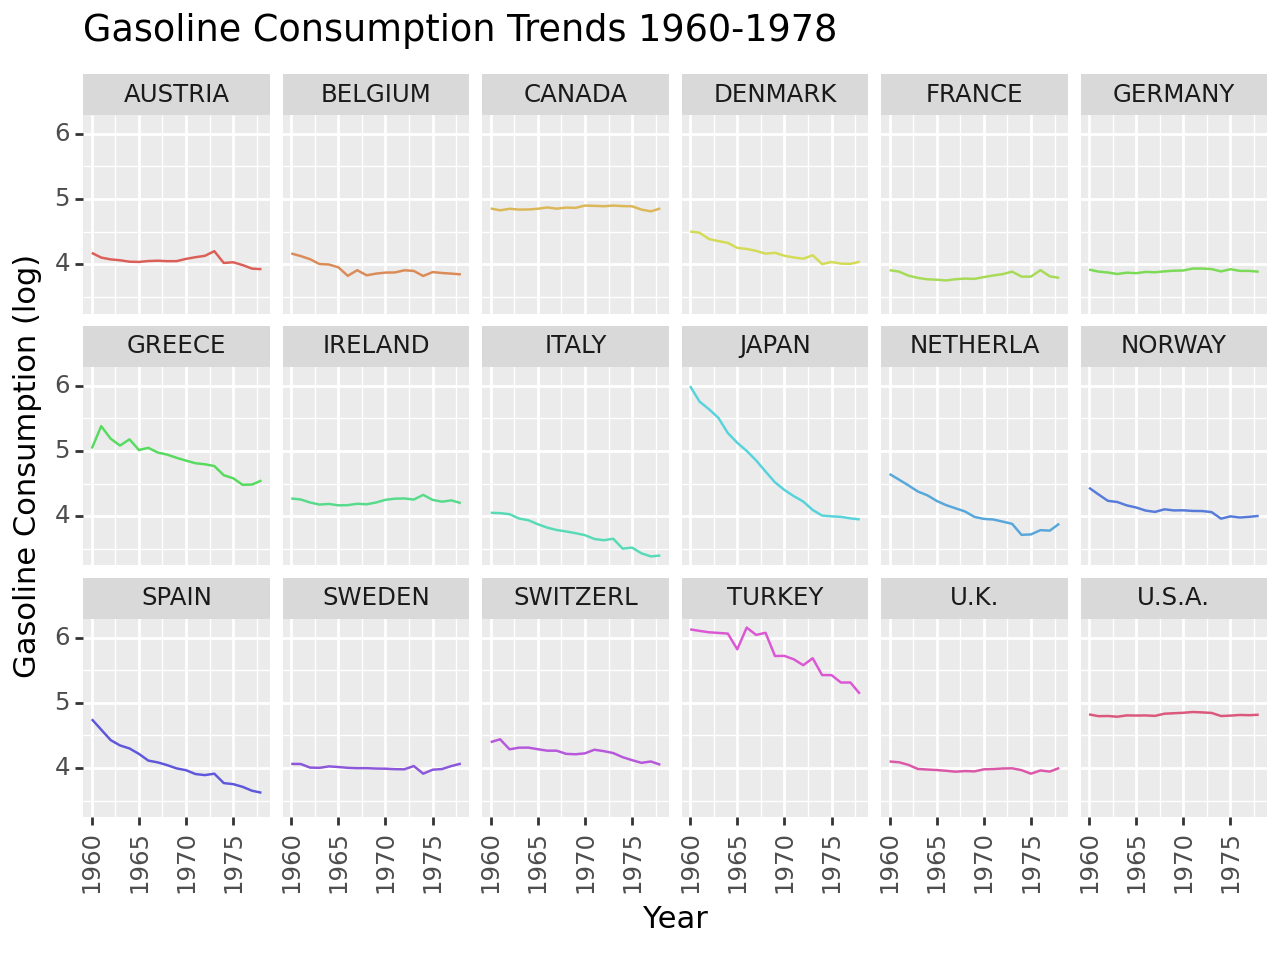

<Figure Size: (640 x 480)>

In [20]:
# Plot by Country, by Year
(gg.ggplot(dat, gg.aes(x = "year", y = "lgaspcar", color = "country")) +
    gg.geom_line() +
    gg.scale_color_discrete(guide = False) +
    gg.xlab("Year") +
    gg.ylab("Gasoline Consumption (log)") +
    gg.ggtitle("Gasoline Consumption Trends 1960-1978") +
    gg.theme(axis_text_x = gg.element_text(rotation = 90)) +
    gg.facet_wrap("country", ncol = 6))

<h5>Text</h5>

```{note}
Text data refers to any sort of written data stored in a text format.
```

Text data can come in a variety of formats.  It can be in a corpus, which is a collection of text or audio, a simple column in a file with one or a few words, or you might see it as below, which is free form text in the form of sentences.  Let's read in a public dataset from the UCI Repository {cite}`UCI_2024` listing email text for spam classification.

In [21]:
# Read in SMS Spam Collection text from Github
url = 'https://github.com/bradybr/practical-data-science-and-ml/blob/main/datasets/SMS%20Spam%20Collection.csv?raw=true'
dat = pd.read_csv(url, encoding = 'unicode_escape')['text']
dat.head(15)

0     Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Ci...
1                                                                 Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 t...
3                                             U dun say so early hor... U c already then say...
4                                 Nah I don't think he goes to usf, he lives around here though
5     FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun y...
6                 Even my brother is not like to speak with me. They treat me like aids patent.
7     As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as...
8     WINNER!! As a valued network customer you have been selected to receivea £900 prize re...
9     Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles...
10    I'm gonna be home soon and i don't

In [22]:
# Concatenate and count the frequencies for each word
sentence_ls = dat.to_list()[1:100]
word_ls = ','.join(sentence_ls).split()
word_freq = [word_ls.count(w) for w in word_ls]

# Create dataframe
word_freq_df = pd.DataFrame(list(zip(word_ls, word_freq))).rename(columns = {0: 'word', 1: 'frequency'})
word_freq_df = word_freq_df.drop_duplicates()
word_freq_df = word_freq_df.sort_values(by = ['frequency'], ascending = False)
word_freq_df.head(10)

,word,frequency
12,to,53
71,you,42
43,I,30
9,a,26
63,and,22
163,the,22
73,for,18
184,i,17
102,your,16
7,in,15


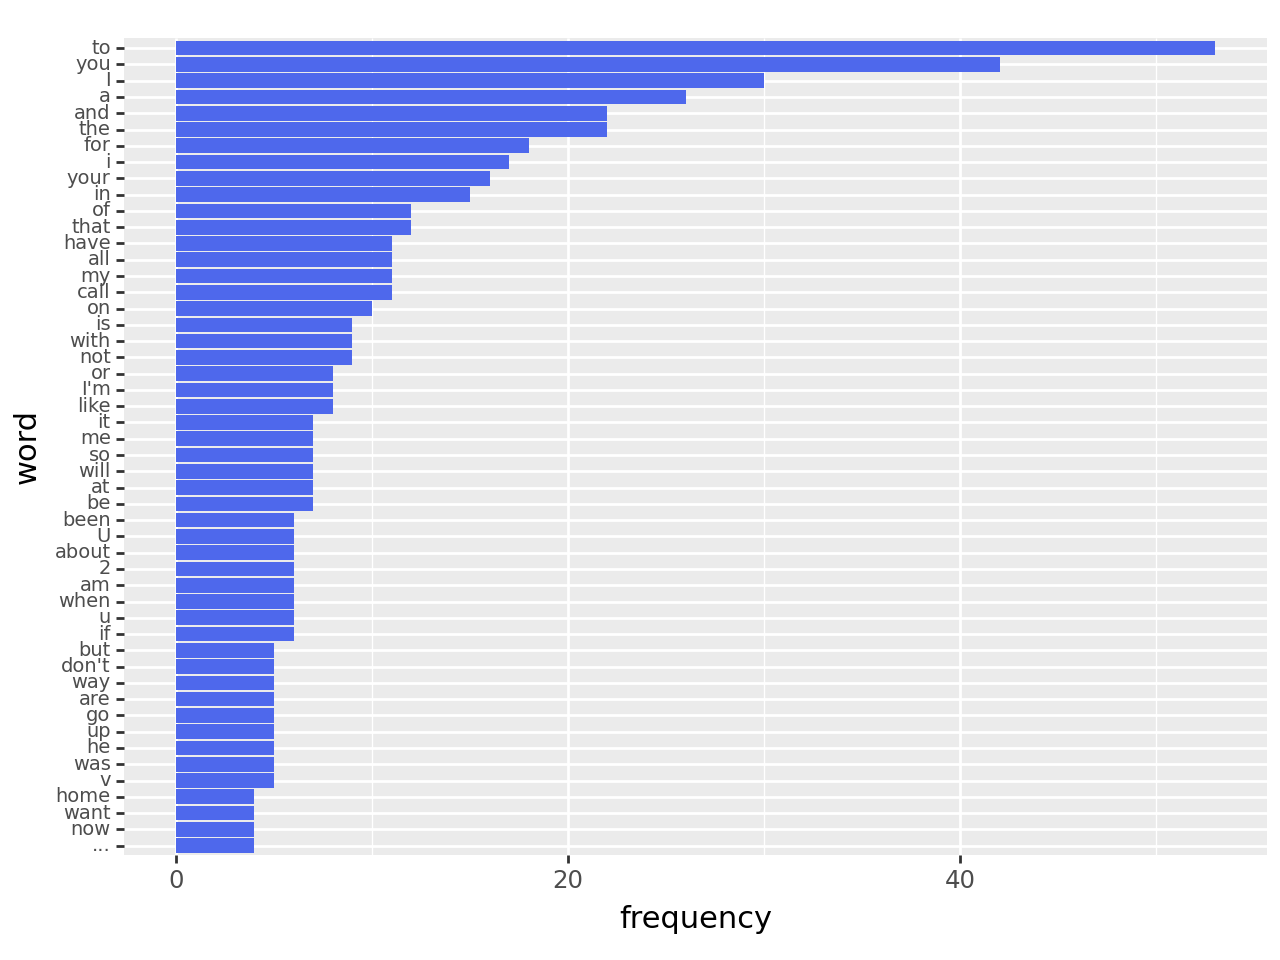

<Figure Size: (640 x 480)>

In [23]:
# Plot top 50 word frequencies
(gg.ggplot(word_freq_df[0:50], gg.aes(x = 'reorder(word, frequency)', y = 'frequency')) +
     gg.geom_bar(stat = 'identity', fill = '#4E68EC') +
     gg.xlab('word') +
     gg.theme(axis_text_y = gg.element_text(size = 7)) +
     gg.coord_flip())

Interesting.  We've plotted the most commonly used words in all of the emails, but notice how many of the words are uninformative?  A lot of the words you see in the list are known as "stop" words.  When you get into working with text for real, you'll learn that there's a _ton_ of preprocessing that needs to happen before you can properly analzye your data.  We'll need to remove stop words, deal with special characters and punctutations, truncate words down to their root, and more!

This at least gives you a basic feel for looking at text, doing some simple manipulations, and plotting basic count frequencies.  More to come.

<h3>What Did We Learn?</h3>

I know this was a long section, but hopefully you're starting to get a taste for what some real data looks like, how to interpret a few format types you'll see, how to perform a few simple manipulations in Python code, and even what kinds of use cases these datasets may line up with.  

There's always so much more detail we could go into, but we will see more of these as we work through the hands on sections that dig into project steps and methogologies.